In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats


## Introduction

For this project, I will interpret data from the National Parks Service about endangered species in different parks. With 2 sets of data: observations.csv with 23281 samples, species_info.csv with 5824 samples total. Observations focuses on what and where samples have been physically observed and recorded and species_info carries data on the possible species that can be observed and there conservations statuses.

+ What is the distribution of conservation_status for animals?
+ Are certain types of species more likely to be endangered?
+ Are the differences between species and their conservation status significant?
+ What is the distribution of Observations for each park?
+ Which species were spotted the most at each park?

## Analysis

In [52]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [53]:
obs = obs.drop_duplicates()
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [54]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23281 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23281 non-null  object
 1   park_name        23281 non-null  object
 2   observations     23281 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 727.5+ KB


In [55]:
species = species.drop_duplicates()
species.head(5)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [56]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 227.5+ KB


In [57]:
#species['conservation_status'] = species['conservation_status'].fillna('Not of Concern')
species = species.dropna()

In [58]:
obs_species  = pd.merge(obs, species, on = 'scientific_name' )

In [59]:
obs_species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 0 to 879
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      880 non-null    object
 1   park_name            880 non-null    object
 2   observations         880 non-null    int64 
 3   category             880 non-null    object
 4   common_names         880 non-null    object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 48.1+ KB


In [60]:
obs_species.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
1,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
2,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
3,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
4,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern


#### What is the distribution of conservation_status for different species?


In [61]:
#Group Bar chart 1 
#sns.countplot(x = 'conservation_status', data = species, hue = 'category', order = ['Endangered','In Recovery','Species of Concern','Threatened'], hue_order = sorted(species.category.unique()))
#plt.xlabel("Category");
#plt.xticks(rotation = 45)
#plt.show()
#plt.clf()


In [77]:
#Stacked - Bar chart 1
species_plot = species.groupby(['category', 'conservation_status' ]).size().reset_index().pivot(columns='category', index='conservation_status', values=0)
species_plot.plot(kind='bar', stacked=True)



KeyError: 'category'

In [ ]:
species_plot = species.groupby(['category', 'conservation_status' ]).size().reset_index().pivot(columns='category', index='conservation_status', values=0)
species_plot.plot(kind='bar', stacked=True)

C:\Users\snjoc\anaconda3\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


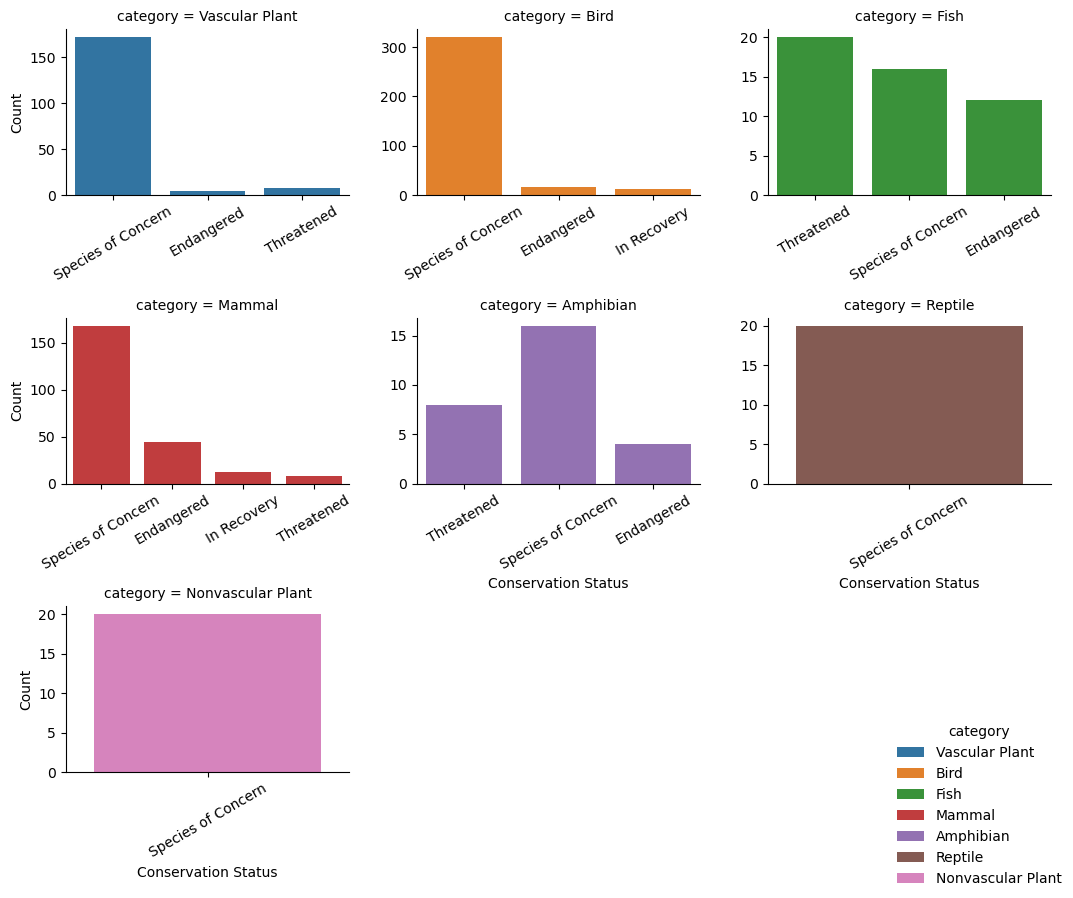

<Figure size 640x480 with 0 Axes>

In [64]:
graph = sns.FacetGrid(obs_species, col="category", col_wrap=3,
                      hue = "category", sharey = False, sharex = False)
graph = graph.map(sns.countplot, 'conservation_status' ).add_legend(loc= 4).set_axis_labels("Conservation Status", "Count");
graph.set_xticklabels( rotation=30)
plt.tight_layout()
plt.show()
plt.clf()

In [65]:
print('{:.0%}'.format(
1.0 - 191/5824))

97%


Based on the bar graphs above distribution seems to be around the the same for Endagered, In Recovery, Threatened with mammals and birds being the top 2 for all except threatened sitting at total counts under 20. Also with the species of concern the standing out alone with a total count of 160. Considering the total amount of samples for this dataframe is 5824 and we only have a total 191 rows filled. 

Means we are missing 97% of data for this column I recommend not using/ 
refering to this column or question due to its lacking.  
After further research the missing data could be refering to the fact that 
the other species are of a non-concerning or least concerning
which is why they dont have a conservation status that signifies danger or concern.
This could mean the missing data could just be 97% of species are of of no concern.

Maybe I could fill nan with : species['conservation_status'].fillna('no-concern')





#### Are certain types of species more likely to be endangered?


If we look at the legends in the previous bar graphs it shows us the different categories of species.
Based on that information Mammals an Birds tend to be majority with fish following, then plants more so vascular plants and amphibians. For non - vascular and reptiles are only in species of concern section.  


#### Are the differences between species and their conservation status significant?


In [66]:
crosstabresult = pd.crosstab(index=species['conservation_status'], columns=species['category'])
crosstabresult

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


In [67]:
species = species['conservation_status'].fillna('no-concern')

In [68]:
from scipy.stats import pearsonr, chi2_contingency
chi2, pval, dof, expected = chi2_contingency(crosstabresult)
print(expected,chi2, pval,dof)

[[ 0.58638743  6.61780105  0.92146597  3.18324607  0.41884817  0.41884817
   3.85340314]
 [ 0.14659686  1.65445026  0.23036649  0.79581152  0.10471204  0.10471204
   0.96335079]
 [ 5.90052356 66.59162304  9.27225131 32.03141361  4.21465969  4.21465969
  38.77486911]
 [ 0.36649215  4.13612565  0.57591623  1.9895288   0.2617801   0.2617801
   2.40837696]] 53.9163631401566 1.8909788349761585e-05 18


With a P-value of 2.4551423165990194e-117 with a significance threshold of 95% the p-value is signicantly less then .05% and the expected values looking different from the observed values indicates that relationship is statistically significant between species and their conservation statuses.

#### What is the distribution of Observations for each park?

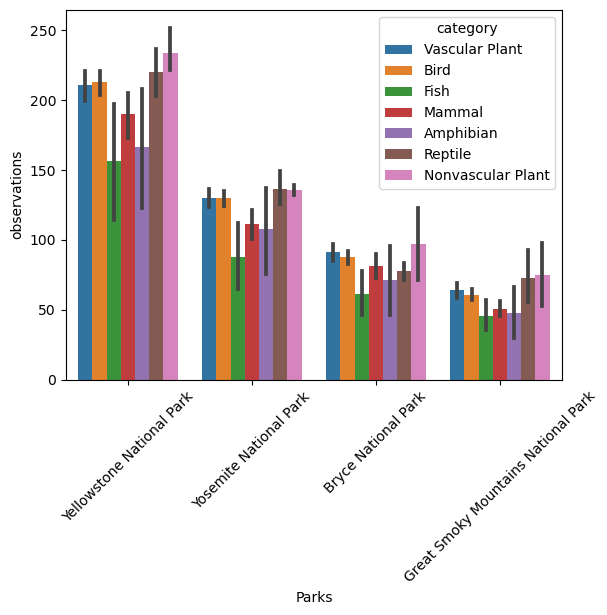

<Figure size 640x480 with 0 Axes>

In [69]:
sns.barplot(x='park_name' , y= 'observations', data= obs_species, hue = 'category', order = ['Yellowstone National Park', 'Yosemite National Park', 'Bryce National Park', 'Great Smoky Mountains National Park'])
plt.xlabel("Parks")
plt.xticks(rotation = 45)
plt.show()
plt.clf()



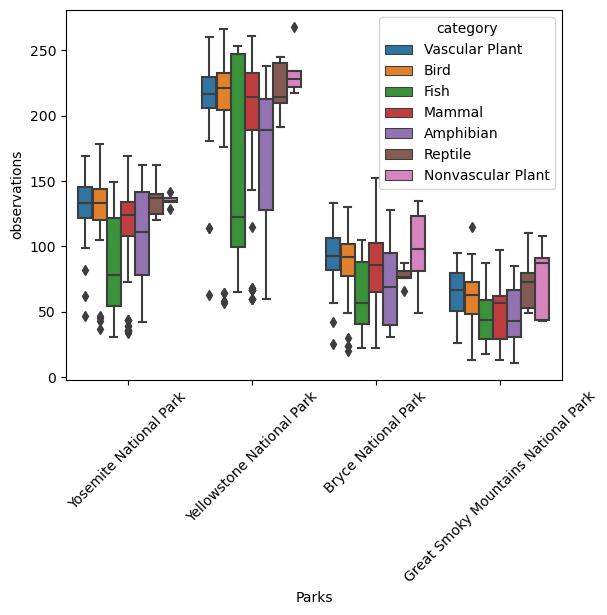

<Figure size 640x480 with 0 Axes>

In [70]:
sns.boxplot(x='park_name' , y= 'observations', data= obs_species, hue = 'category')
plt.xlabel("Parks")
plt.xticks(rotation = 45)
plt.show()
plt.clf()


According the bar graph above Great Smoky Mountains having the least average amount observations bryce around 100, and yosemite with more around 150 and yellow stone with the most at around 250 observations. With a range of about 175 between the highes and lowest. I'd say there is a variance of observations between each park.  

#### Which species were spotted the most at each park?

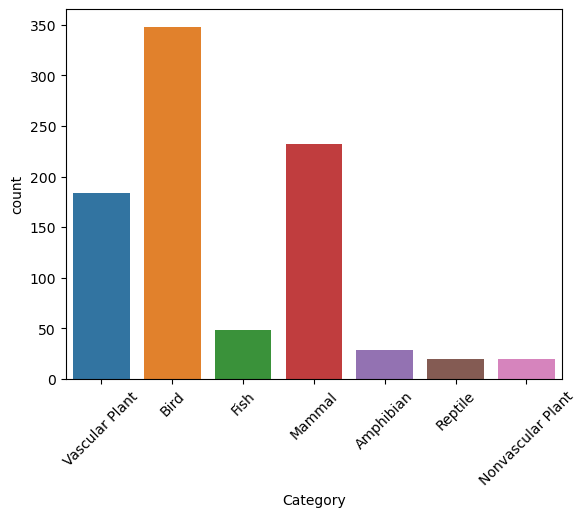

<Figure size 640x480 with 0 Axes>

In [71]:
sns.countplot(x = 'category', data= obs_species)
plt.xlabel("Category")
plt.xticks(rotation = 45)
plt.show()
plt.clf()

In [72]:
# To find max observations for each park
smoky = obs_species[obs_species['park_name'] == 'Great Smoky Mountains National Park']
yosemite = obs_species[obs_species['park_name'] == 'Yosemite National Park']
yellow = obs_species[obs_species['park_name'] == 'Yellowstone National Park']
bryce = obs_species[obs_species['park_name'] == 'Bryce National Park']

In [73]:
smoky[smoky['observations'] == smoky.observations.max()]

,scientific_name,park_name,observations,category,common_names,conservation_status
112,Aythya affinis,Great Smoky Mountains National Park,115,Bird,Lesser Scaup,Species of Concern


In [74]:
yosemite[yosemite['observations'] == yosemite.observations.max()]

,scientific_name,park_name,observations,category,common_names,conservation_status
634,Pyrocephalus rubinus,Yosemite National Park,178,Bird,Vermilion Flycatcher,Species of Concern


In [75]:
yellow[yellow['observations'] == yellow.observations.max()]

,scientific_name,park_name,observations,category,common_names,conservation_status
646,Bazzania nudicaulis,Yellowstone National Park,268,Nonvascular Plant,Bazzania,Species of Concern


In [76]:
bryce[bryce['observations'] == bryce.observations.max()]

,scientific_name,park_name,observations,category,common_names,conservation_status
758,Myotis austroriparius,Bryce National Park,152,Mammal,"Mississippi Myotis, Southeastern Myotis",Species of Concern


The Vascular plants are the most observed species found in all the parks toghether and each park individually. 
This makes sense as that vascular plant observations sit at over 4000 while the animal species + non-vascular plants observations are generally below 700. 

## CONCLUSION

+ What is the distribution of conservation_status for animals?
+ Are certain types of species more likely to be endangered?
+ Are the differences between species and their conservation status significant?
+ What is the distribution of Observations for each park?
+ Which species were spotted the most at each park?